In [17]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# Tải một tệp âm thanh mẫu
adult_voice_path = 'data/adult voice/1a3a3175-6998-4914-b7a5-d445882ac954.wav'
baby_cry_path = 'data/baby cry/f5b29377-7cd6-4688-942c-5a07add39dc5-1437480263225-1.7-f-26-dc.wav'

y_adult, sr_adult = librosa.load(adult_voice_path, sr=16000)
y_baby, sr_baby = librosa.load(baby_cry_path, sr=16000)
print(sr_adult, sr_baby)

16000 16000


In [19]:
# Trích xuất các đặc trưng
mfcc_adult = librosa.feature.mfcc(y=y_adult, sr=sr_adult, n_mfcc=13)
mfcc_baby = librosa.feature.mfcc(y=y_baby, sr=sr_baby, n_mfcc=13)

chroma_adult = librosa.feature.chroma_stft(y=y_adult, sr=sr_adult)
chroma_baby = librosa.feature.chroma_stft(y=y_baby, sr=sr_baby)

zcr_adult = librosa.feature.zero_crossing_rate(y_adult)
zcr_baby = librosa.feature.zero_crossing_rate(y_baby)

rms_adult = librosa.feature.rms(y=y_adult)
rms_baby = librosa.feature.rms(y=y_baby)

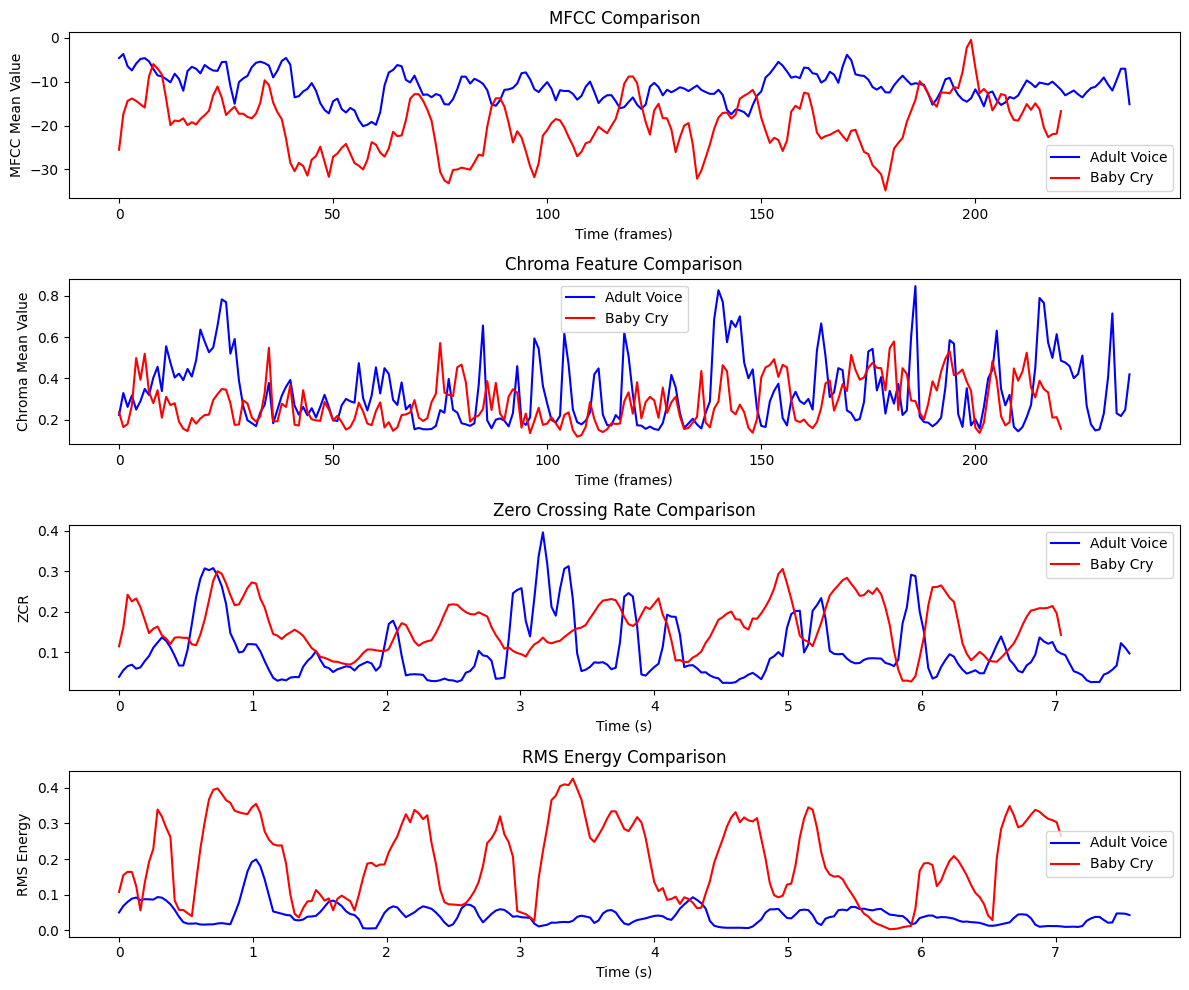

In [20]:
# Tạo biểu đồ so sánh
plt.figure(figsize=(12, 10))

# MFCC (dạng đường thẳng)
plt.subplot(4, 1, 1)
plt.plot(np.mean(mfcc_adult, axis=0), label='Adult Voice', color='blue')
plt.plot(np.mean(mfcc_baby, axis=0), label='Baby Cry', color='red')
plt.title("MFCC Comparison")
plt.xlabel("Time (frames)")
plt.ylabel("MFCC Mean Value")
plt.legend()

# Chroma (dạng đường thẳng)
plt.subplot(4, 1, 2)
plt.plot(np.mean(chroma_adult, axis=0), label='Adult Voice', color='blue')
plt.plot(np.mean(chroma_baby, axis=0), label='Baby Cry', color='red')
plt.title("Chroma Feature Comparison")
plt.xlabel("Time (frames)")
plt.ylabel("Chroma Mean Value")
plt.legend()

# Zero Crossing Rate
plt.subplot(4, 1, 3)
plt.plot(librosa.times_like(zcr_adult, sr=sr_adult), zcr_adult[0], color='blue', label='Adult Voice')
plt.plot(librosa.times_like(zcr_baby, sr=sr_baby), zcr_baby[0], color='red', label='Baby Cry')
plt.xlabel('Time (s)')
plt.ylabel('ZCR')
plt.title("Zero Crossing Rate Comparison")
plt.legend()

# RMS Energy
plt.subplot(4, 1, 4)
plt.plot(librosa.times_like(rms_adult, sr=sr_adult), rms_adult[0], color='blue', label='Adult Voice')
plt.plot(librosa.times_like(rms_baby, sr=sr_baby), rms_baby[0], color='red', label='Baby Cry')
plt.xlabel('Time (s)')
plt.ylabel('RMS Energy')
plt.title("RMS Energy Comparison")
plt.legend()

plt.tight_layout()
plt.show()